<a href="https://colab.research.google.com/github/danangdb/latihan/blob/main/Final_Project_AB_Testing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 1. Import Library

In [31]:
# load library dan viasualisasi
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math

#import model
import statsmodels.formula.api as smf

#import statistics
import scipy.stats as stats
from scipy.stats import ttest_ind


## 2. Import Data from Google Drive

In [4]:
#import data from google drive
from google.colab import drive

drive.mount('/content/gdrive/', force_remount=True)

Mounted at /content/gdrive/


In [5]:
df = pd.read_csv('/content/gdrive/MyDrive/Data Science/dataset/marketing_AB.csv')


## 3. Data Exploration

In [6]:
df.head()

,Unnamed: 0,user id,test group,converted,total ads,most ads day,most ads hour
0,0,1069124,ad,False,130,Monday,20
1,1,1119715,ad,False,93,Tuesday,22
2,2,1144181,ad,False,21,Tuesday,18
3,3,1435133,ad,False,355,Tuesday,10
4,4,1015700,ad,False,276,Friday,14


In [15]:
df.shape

(588101, 7)

In [7]:
df.describe()

,Unnamed: 0,user id,total ads,most ads hour
count,588101.000000,5.881010e+05,588101.000000,588101.000000
mean,294050.000000,1.310692e+06,24.820876,14.469061
std,169770.279668,2.022260e+05,43.715181,4.834634
min,0.000000,9.000000e+05,1.000000,0.000000
25%,147025.000000,1.143190e+06,4.000000,11.000000
50%,294050.000000,1.313725e+06,13.000000,14.000000
75%,441075.000000,1.484088e+06,27.000000,18.000000
max,588100.000000,1.654483e+06,2065.000000,23.000000


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 588101 entries, 0 to 588100
Data columns (total 7 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   Unnamed: 0     588101 non-null  int64 
 1   user id        588101 non-null  int64 
 2   test group     588101 non-null  object
 3   converted      588101 non-null  bool  
 4   total ads      588101 non-null  int64 
 5   most ads day   588101 non-null  object
 6   most ads hour  588101 non-null  int64 
dtypes: bool(1), int64(4), object(2)
memory usage: 27.5+ MB


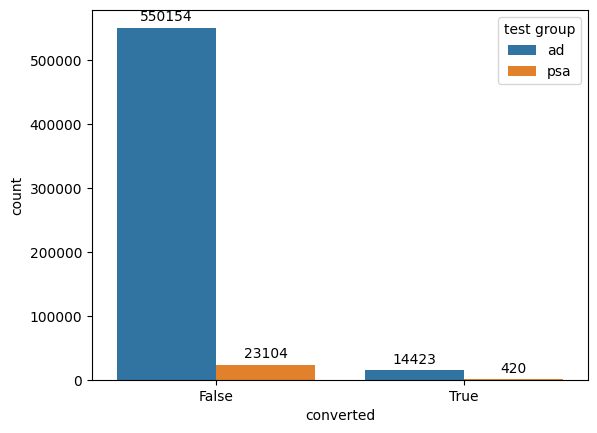

In [28]:
ax = sns.countplot(x="converted", hue="test group", data=df)

# Get the counts for each bar
counts = df.groupby(["test group", "converted"]).size().reset_index(name="count")

# Add text to each bar
for i, bar in enumerate(ax.containers):
    for j, count in enumerate(bar):
        height = count.get_height()
        ax.annotate(counts.iloc[i*2+j]["count"], xy=(count.get_x() + count.get_width() / 2, height),
                    xytext=(0, 3), textcoords="offset points", ha="center", va="bottom")

plt.show()

In [33]:
ttest_results = ttest_ind(df[df["test group"] == "ad"]["converted"], 
                          df[df["test group"] == "psa"]["converted"])
print(ttest_results)

Ttest_indResult(statistic=7.37040597428566, pvalue=1.7033052627831264e-13)


In [34]:
conversion_rates = df.groupby("test group")["converted"].mean()
print(conversion_rates)

test group
ad     0.025547
psa    0.017854
Name: converted, dtype: float64


In [35]:
# Calculate conversion rate by day and test group
conversion_by_day = df.groupby(["most ads day", "test group"])["converted"].mean()

# Reshape the data from long to wide format
conversion_by_day = conversion_by_day.unstack(level=1)

# Sort the values in descending order
conversion_by_day = conversion_by_day.sort_values(by=["ad", "psa"], ascending=False)

# Print the result
print(conversion_by_day)

test group          ad       psa
most ads day                    
Monday        0.033241  0.022559
Tuesday       0.030440  0.014448
Wednesday     0.025356  0.015759
Sunday        0.024620  0.020595
Friday        0.022465  0.016303
Thursday      0.021637  0.020230
Saturday      0.021307  0.013996


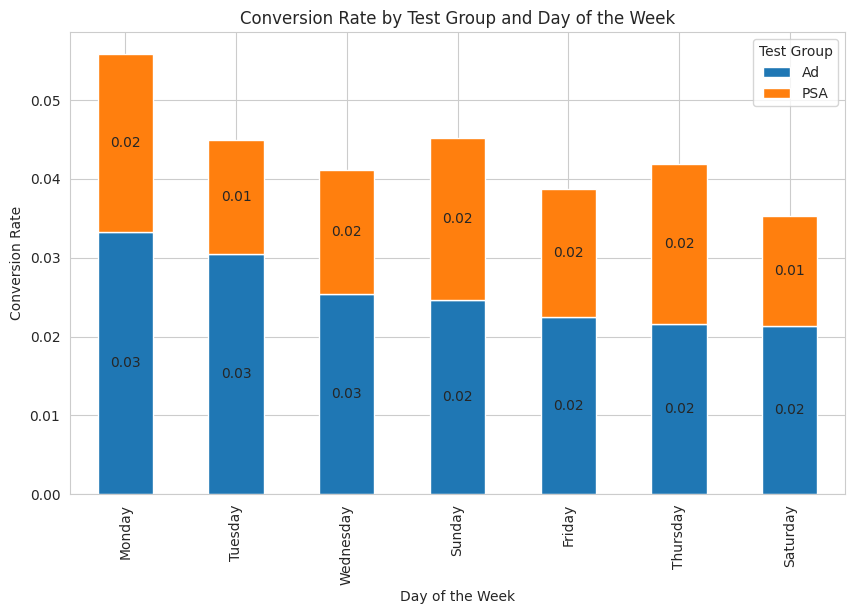

In [37]:
 #Sort the values in descending order
conversion_by_day = conversion_by_day.sort_values(by=["ad", "psa"], ascending=False)

# Create a stacked bar plot of the conversion rate by day and test group
sns.set_style("whitegrid")
ax = conversion_by_day.plot(kind="bar", stacked=True, figsize=(10, 6))
plt.title("Conversion Rate by Test Group and Day of the Week")
plt.xlabel("Day of the Week")
plt.ylabel("Conversion Rate")

# Add value labels to each bar segment
for i in range(conversion_by_day.shape[0]):
    ad_value = conversion_by_day.iloc[i]["ad"]
    psa_value = conversion_by_day.iloc[i]["psa"]
    ax.text(i, ad_value / 2, f"{ad_value:.2f}", ha="center", va="center")
    ax.text(i, ad_value + psa_value / 2, f"{psa_value:.2f}", ha="center", va="center")

plt.legend(title="Test Group", labels=["Ad", "PSA"])
plt.show()